In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime
import time

In [2]:
df = pd.read_csv("..\\raw_data_30m\\currency_pairs\\EURUSD_M30.csv", sep='\t')

In [3]:
# df = df[:500]
df

,Time,Open,High,Low,Close,Volume
0,2007-02-05 10:30:00,1.29246,1.29273,1.29162,1.29273,277811
1,2007-02-05 11:00:00,1.29271,1.29325,1.29240,1.29304,157253
2,2007-02-05 11:30:00,1.29304,1.29351,1.29270,1.29336,106005
3,2007-02-05 12:00:00,1.29331,1.29337,1.29257,1.29297,99885
4,2007-02-05 12:30:00,1.29295,1.29360,1.29231,1.29266,68612
...,...,...,...,...,...,...
199995,2023-02-10 13:00:00,1.06736,1.06766,1.06709,1.06712,3963
199996,2023-02-10 13:30:00,1.06712,1.06751,1.06680,1.06744,5103
199997,2023-02-10 14:00:00,1.06742,1.06750,1.06709,1.06730,3513
199998,2023-02-10 14:30:00,1.06732,1.06786,1.06731,1.06783,2894


In [178]:
# Define periods
k_period = 14
d_period = 3

# Adds a "n_high" column with max value of previous 14 periods
df['n_high'] = df['High'].rolling(k_period).max()

# Adds an "n_low" column with min value of previous 14 periods
df['n_low'] = df['Low'].rolling(k_period).min()

# Uses the min/max values to calculate the %k (as a percentage)
df['%K'] = (df['Close'] - df['n_low']) * 100 / (df['n_high'] - df['n_low'])

# Uses the %k to calculates a SMA over the past 3 values of %k
df['%D'] = df['%K'].rolling(d_period).mean()

In [179]:
df

,Time,Open,High,Low,Close,Volume,n_high,n_low,%K,%D
0,2007-02-05 10:30:00,1.29246,1.29273,1.29162,1.29273,277811,NaN,NaN,NaN,NaN
1,2007-02-05 11:00:00,1.29271,1.29325,1.29240,1.29304,157253,NaN,NaN,NaN,NaN
2,2007-02-05 11:30:00,1.29304,1.29351,1.29270,1.29336,106005,NaN,NaN,NaN,NaN
3,2007-02-05 12:00:00,1.29331,1.29337,1.29257,1.29297,99885,NaN,NaN,NaN,NaN
4,2007-02-05 12:30:00,1.29295,1.29360,1.29231,1.29266,68612,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
199995,2023-02-10 13:00:00,1.06736,1.06766,1.06709,1.06712,3963,1.07067,1.06661,12.561576,11.843782
199996,2023-02-10 13:30:00,1.06712,1.06751,1.06680,1.06744,5103,1.07067,1.06661,20.443350,17.241379
199997,2023-02-10 14:00:00,1.06742,1.06750,1.06709,1.06730,3513,1.07067,1.06661,16.995074,16.666667
199998,2023-02-10 14:30:00,1.06732,1.06786,1.06731,1.06783,2894,1.07067,1.06661,30.049261,22.495895


In [180]:
import pandas_ta as ta

In [181]:
df.ta.stoch(high='high', low='low', k=14, d=3, append=True)

,STOCHk_14_3_3,STOCHd_14_3_3
13,NaN,NaN
14,NaN,NaN
15,61.278499,NaN
16,65.333333,NaN
17,71.445409,66.019081
...,...,...
199995,11.843782,9.664968
199996,17.241379,13.503718
199997,16.666667,15.250609
199998,22.495895,18.801314


In [183]:
df = df.dropna()
df.reset_index(inplace=True)

In [185]:
df = df.drop('index', axis=1)

In [186]:
df

,Time,Open,High,Low,Close,Volume,n_high,n_low,%K,%D,STOCHk_14_3_3,STOCHd_14_3_3
0,2007-02-05 19:00:00,1.29324,1.29366,1.29261,1.29303,24007,1.29366,1.29185,65.193370,71.445409,71.445409,66.019081
1,2007-02-05 19:30:00,1.29302,1.29332,1.29261,1.29298,24364,1.29366,1.29185,62.430939,67.303341,67.303341,68.027361
2,2007-02-05 20:00:00,1.29292,1.29334,1.29228,1.29271,24151,1.29366,1.29185,47.513812,58.379374,58.379374,65.709375
3,2007-02-05 20:30:00,1.29281,1.29293,1.29206,1.29240,24225,1.29366,1.29185,30.386740,46.777164,46.777164,57.486626
4,2007-02-05 21:00:00,1.29250,1.29275,1.29185,1.29269,24195,1.29366,1.29185,46.408840,41.436464,41.436464,48.864334
...,...,...,...,...,...,...,...,...,...,...,...,...
199978,2023-02-10 13:00:00,1.06736,1.06766,1.06709,1.06712,3963,1.07067,1.06661,12.561576,11.843782,11.843782,9.664968
199979,2023-02-10 13:30:00,1.06712,1.06751,1.06680,1.06744,5103,1.07067,1.06661,20.443350,17.241379,17.241379,13.503718
199980,2023-02-10 14:00:00,1.06742,1.06750,1.06709,1.06730,3513,1.07067,1.06661,16.995074,16.666667,16.666667,15.250609
199981,2023-02-10 14:30:00,1.06732,1.06786,1.06731,1.06783,2894,1.07067,1.06661,30.049261,22.495895,22.495895,18.801314


In [187]:
df.to_csv('..\\pre_processed_data\\stochrsi\\eurusd_m30_stochrsi.csv')

In [4]:
df= pd.read_csv('..\\pre_processed_data\\stochrsi\\eurusd_m30_stochrsi.csv')

In [6]:
final_df = df.drop(['Unnamed: 0', 'Time', 'Open', 'High', 'Low', 'Volume', 'n_high', 'n_low', '%K', '%D'], axis=1)

In [7]:
final_df.rename(columns={
    'STOCHk_14_3_3':'K',
    'STOCHd_14_3_3':'D'
}, inplace=True)

In [8]:
# crossover atm is just d > or < k and not really crossovers, so noise can be reduced with proper signals 
final_df['Crossover'] = 0

In [9]:
final_df['Crossover'] = np.where(((final_df['D'] < 20) & (final_df['D'] < 20) &(final_df['K'] > final_df['D'])) , 1,
                          np.where(((final_df['D'] > 80) & (final_df['K'] > 80) & (final_df['K'] < final_df['D'])), -1, final_df['Crossover']))

In [10]:
final_df

,Close,K,D,Crossover
0,1.29303,71.445409,66.019081,0
1,1.29298,67.303341,68.027361,0
2,1.29271,58.379374,65.709375,0
3,1.29240,46.777164,57.486626,0
4,1.29269,41.436464,48.864334,0
...,...,...,...,...
199978,1.06712,11.843782,9.664968,1
199979,1.06744,17.241379,13.503718,1
199980,1.06730,16.666667,15.250609,1
199981,1.06783,22.495895,18.801314,1


In [11]:
# Wins/loss/BE can be embedded, but atm only potential wins, can reduce noise and avoid loss making trades
# also including high and low can increase chances of wins in high impact events
N = 14 
final_df['Win'] = 0 

In [12]:
for i in range(len(final_df)):
    if final_df.iloc[i]['Crossover'] != 0:
        start = i
        end = min(len(final_df), start + N)
        if end < len(final_df):
            price_change = (final_df.iloc[end]['Close'] - final_df.iloc[start]['Close']) / final_df.iloc[start]['Close']
            if final_df.iloc[i]['Crossover'] == 1:
                if price_change >= 0.0025:
                    final_df.at[i, 'Win'] = 1
                else:
                    final_df.at[i, 'Win'] = 0
            elif final_df.iloc[i]['Crossover'] == -1:
                if price_change <= -0.0025:
                    final_df.at[i, 'Win'] = 1
                else:
                    final_df.at[i, 'Win'] = 0


In [13]:
final_df.to_csv('..\\final_data\\stoch_rsi\\eurusd_final_df.csv')

In [14]:
final_df

,Close,K,D,Crossover,Win
0,1.29303,71.445409,66.019081,0,0
1,1.29298,67.303341,68.027361,0,0
2,1.29271,58.379374,65.709375,0,0
3,1.29240,46.777164,57.486626,0,0
4,1.29269,41.436464,48.864334,0,0
...,...,...,...,...,...
199978,1.06712,11.843782,9.664968,1,0
199979,1.06744,17.241379,13.503718,1,0
199980,1.06730,16.666667,15.250609,1,0
199981,1.06783,22.495895,18.801314,1,0


In [15]:
# data to be fed is already in int or float state, so no conversion is needed
final_df.dtypes 

Close        float64
K            float64
D            float64
Crossover      int64
Win            int64
dtype: object

In [16]:
final_df.shape

(199983, 5)

In [17]:
x0=[]
x1=[]
x2=[]
x3=[]
y=[]

In [18]:
# taking sample size of 140 which should be 28 or 56 at best but :)
for i in range (0, final_df.shape[0] - 14):
    x0.append(final_df.iloc[i:i+14, 0])
    x1.append(final_df.iloc[i:i+14, 1])
    x2.append(final_df.iloc[i:i+14, 2])
    x3.append(final_df.iloc[i:i+14, 3])
    y.append(final_df.iloc[i+14, 4])

In [19]:
x0, x1, x2, x3, y = np.array(x0), np.array(x1), np.array(x2), np.array(x3), np.array(y)

In [20]:
y=np.reshape(y, (len(y), 1))
# the expected shape of label is (x, y) and it is important to convert it as 

In [21]:
# scaling the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
x0 = scaler.fit_transform(x0)
x1 = scaler.fit_transform(x1)
x2 = scaler.fit_transform(x2)
x3 = scaler.fit_transform(x3)
y = scaler.fit_transform(y)

In [22]:
X = np.stack([x0, x1, x2, x3], axis=2)


In [23]:
X.shape

(199969, 14, 4)

In [24]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import CuDNNLSTM, Dense
from keras import optimizers

In [25]:
# splitting the data for testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [56]:
model = Sequential()

In [60]:
model.add(CuDNNLSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(CuDNNLSTM(64, return_sequences=False))
model.add(Dense(64, activation='Step'))
model.add(Dense(1))

ValueError: Input 0 of layer "cu_dnnlstm_9" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 64)

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cu_dnnlstm_3 (CuDNNLSTM)    (None, 14, 64)            17920     
                                                                 
 cu_dnnlstm_4 (CuDNNLSTM)    (None, 64)                33280     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 55,425
Trainable params: 55,425
Non-trainable params: 0
_________________________________________________________________


In [37]:
# from keras.callbacks import ModelCheckpoint, EarlyStopping

filepath = '..//models//{epoch:02d}-{loss:.4f}-{val_loss:.4f}-{mae:.4f}-{val_mae:.4f}.hdf5'

# callbacks = [EarlyStopping(monitor='val_loss', patience=20),
#             ModelCheckpoint(filepath, monitor='loss', save_best_only=True, mode='min')]
            

In [48]:
optimizers.SGD(momentum=0.9)
model.compile(optimizer='SGD', loss='mse', metrics=['mae'])

In [49]:
model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=5)


Epoch 1/20
2844/2844 [==============================] - 27s 9ms/step - loss: 0.0193 - mae: 0.0384 - val_loss: 0.0184 - val_mae: 0.0310
Epoch 2/20
2844/2844 [==============================] - 24s 9ms/step - loss: 0.0187 - mae: 0.0373 - val_loss: 0.0183 - val_mae: 0.0348
Epoch 3/20
2844/2844 [==============================] - 25s 9ms/step - loss: 0.0187 - mae: 0.0372 - val_loss: 0.0183 - val_mae: 0.0309
Epoch 4/20
2844/2844 [==============================] - 26s 9ms/step - loss: 0.0187 - mae: 0.0372 - val_loss: 0.0183 - val_mae: 0.0433
Epoch 5/20
2844/2844 [==============================] - 30s 11ms/step - loss: 0.0187 - mae: 0.0372 - val_loss: 0.0184 - val_mae: 0.0273
Epoch 6/20
2844/2844 [==============================] - 27s 9ms/step - loss: 0.0187 - mae: 0.0372 - val_loss: 0.0183 - val_mae: 0.0321
Epoch 7/20
2844/2844 [==============================] - 26s 9ms/step - loss: 0.0187 - mae: 0.0372 - val_loss: 0.0184 - val_mae: 0.0479
Epoch 8/20
2844/2844 [==============================] 

In [50]:
model.save('n2.h5')

In [51]:
MSE, MAE = model.evaluate(X_test, y_test)
print(MSE, MAE)


1250/1250 [==============================] - 8s 6ms/step - loss: 0.0197 - mae: 0.0423
0.019691860303282738 0.04231882467865944


In [52]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
predictions


1250/1250 [==============================] - 6s 5ms/step


array([[0.01823967],
       [0.02505308],
       [0.02651515],
       ...,
       [0.02456816],
       [0.02002215],
       [0.02432363]], dtype=float32)

In [ ]:
# no plot

<function matplotlib.pyplot.show(close=None, block=None)>

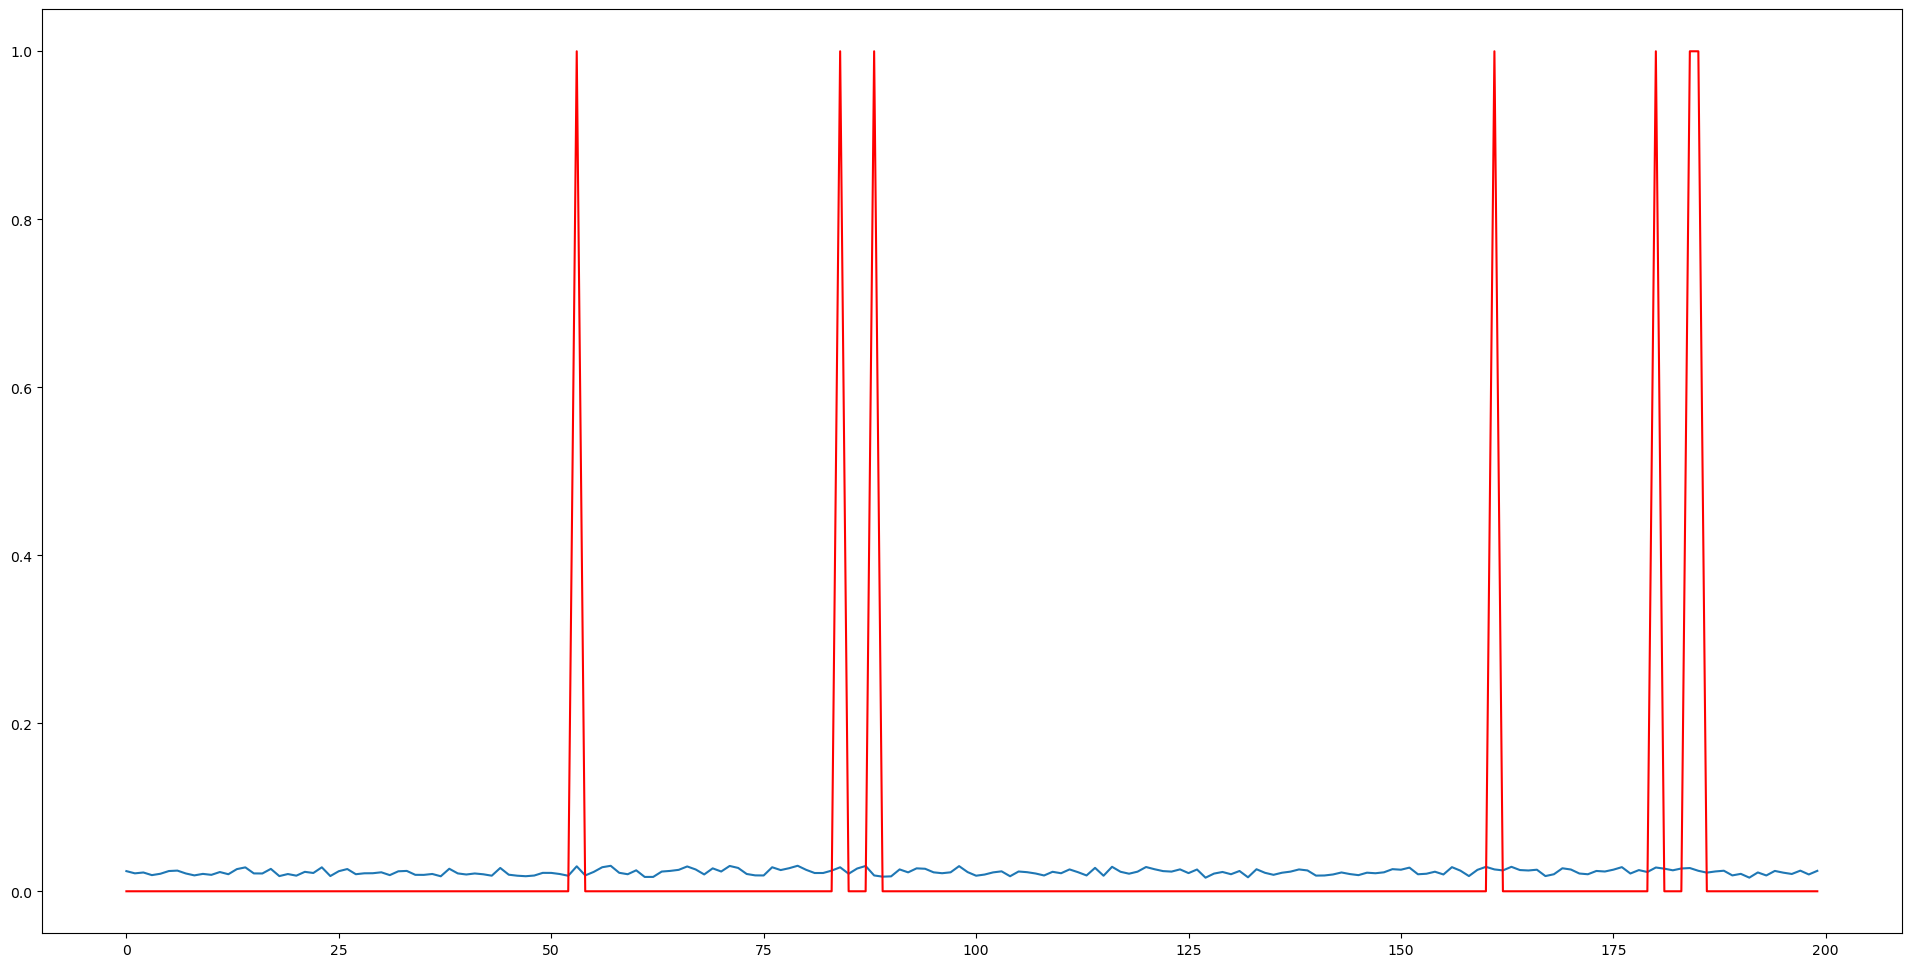

In [54]:
plt.figure(figsize=(24,12))
plt.plot(predictions[-200:])
plt.plot(scaler.inverse_transform(y_test[-200:]),  'r')
plt.show

In [55]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.019691860303282738
Test accuracy: 0.04231882467865944
